## Loading Custom data

In [1]:
import torch
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
FOLDER_DATASET = "./Track_1_Wheel_Test/"
curr_dir = os.getcwd()
plt.ion()

### Create class parent of Dataset
This class will be responsible to provide to torch how to load data with __getitem__ and how big is our dataset with __len__

In [43]:
class DriveData(Dataset):
    __xs = []
    __ys = []
        
    def __init__(self, folder_dataset, transform=None):
        self.transform = transform
        # Open and load text file including the whole training data
        with open(folder_dataset + "data.txt") as f:
            for line in f:
                # Image path
                self.__xs.append(folder_dataset + line.split()[0])        
                # Steering wheel label
                self.__ys.append(np.float32(line.split()[1]))

    # Override to give PyTorch access to any image on the dataset
    def __getitem__(self, index):
        img = Image.open(self.__xs[index])
        img = img.convert('RGB')
        if self.transform is not None:
            img = self.transform(img)
            
        # Convert image and label to torch tensors
        img = torch.from_numpy(np.asarray(img))
        label = torch.from_numpy(np.asarray(self.__ys[index]).reshape([1,1]))
        return img, label

    # Override to give PyTorch size of dataset
    def __len__(self):
        return len(self.__xs)

In [44]:
# Instantiate a dataset
dset_train = DriveData(FOLDER_DATASET)

### Create a DataLoader
Now we need to pass the dataset to the dataloader, now PyTorch will handle all the shuffling and batch management for you.

In [45]:
train_loader = DataLoader(dset_train,
                          batch_size=10,
                          shuffle=True,
                          num_workers=1 # 1 for CUDA
                         # pin_memory=True # CUDA only
                         )

### Get a Batch

Batch shape: (10, 256, 256, 3)


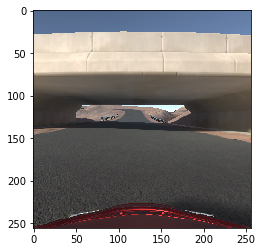

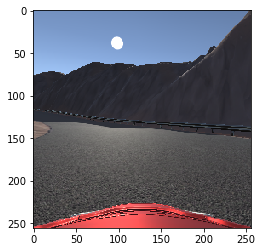

In [64]:
# Get a batch of training data
imgs, steering_angle = next(iter(train_loader))
print('Batch shape:',imgs.numpy().shape)
plt.imshow(imgs.numpy()[0,:,:,:])
plt.show()
plt.imshow(imgs.numpy()[-1,:,:,:])
plt.show()

# If you want the batch on a for-loop
# for batch_idx, (data, target) in enumerate(train_loader):